In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2023-04-27 09:18:31.436913: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated ASCAT data

In [3]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"

In [4]:
with open(data_dir + 'collocated_dict_ascat.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [5]:
df = pd.concat(d.values(), ignore_index=True)
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,sigma0_trip_mid,sigma0_trip_aft,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time
0,-0.206139,0.019858,343.905002,2451.507694,1023.181497,1024.397491,6.762046,7.047165,76.475700,74.968022,...,-21.813454,-20.123533,51.879997,98.059998,144.080002,62.809998,51.439999,62.849998,20161014T135100Z,20161014T152958.125000Z
1,-0.227366,0.036945,322.459999,2451.771327,1023.577427,1024.794501,6.575395,6.833194,74.707349,73.294888,...,-21.813454,-20.123533,51.879997,98.059998,144.080002,62.809998,51.439999,62.849998,20161014T135100Z,20161014T152958.125000Z
2,-0.034786,-0.033168,307.705002,2452.064453,1025.096147,1026.312994,6.484017,6.711902,71.141400,69.848437,...,-8.723687,-12.308812,117.649994,72.750000,27.680000,36.759998,27.459999,36.739998,20161014T235700Z,20161015T013858.125000Z
3,-0.012377,-0.102068,304.399997,2452.066665,1025.821253,1027.037988,6.368535,6.619516,69.104550,67.615744,...,-8.723687,-12.308812,117.649994,72.750000,27.680000,36.759998,27.459999,36.739998,20161014T235700Z,20161015T013858.125000Z
4,-0.061342,-0.196020,297.654999,2452.234680,1026.502979,1027.719995,6.034159,6.264792,64.672649,63.218720,...,-18.114204,-21.154348,-144.369995,-98.279999,-52.160000,61.489998,49.980000,61.379997,20161015T005100Z,20161015T023258.125000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3148,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-18.908571,-21.115072,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z
3149,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,-14.651740,-17.077446,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z
3150,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,-14.651740,-17.077446,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z
3151,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-13.120513,-17.850687,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z


In [6]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,sigma0_trip_mid,sigma0_trip_aft,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time
0,-0.206139,0.019858,343.905002,2451.507694,1023.181497,1024.397491,6.762046,7.047165,76.475700,74.968022,...,-21.813454,-20.123533,51.879997,98.059998,144.080002,62.809998,51.439999,62.849998,20161014T135100Z,20161014T152958.125000Z
1,-0.227366,0.036945,322.459999,2451.771327,1023.577427,1024.794501,6.575395,6.833194,74.707349,73.294888,...,-21.813454,-20.123533,51.879997,98.059998,144.080002,62.809998,51.439999,62.849998,20161014T135100Z,20161014T152958.125000Z
2,-0.034786,-0.033168,307.705002,2452.064453,1025.096147,1026.312994,6.484017,6.711902,71.141400,69.848437,...,-8.723687,-12.308812,117.649994,72.750000,27.680000,36.759998,27.459999,36.739998,20161014T235700Z,20161015T013858.125000Z
3,-0.012377,-0.102068,304.399997,2452.066665,1025.821253,1027.037988,6.368535,6.619516,69.104550,67.615744,...,-8.723687,-12.308812,117.649994,72.750000,27.680000,36.759998,27.459999,36.739998,20161014T235700Z,20161015T013858.125000Z
4,-0.061342,-0.196020,297.654999,2452.234680,1026.502979,1027.719995,6.034159,6.264792,64.672649,63.218720,...,-18.114204,-21.154348,-144.369995,-98.279999,-52.160000,61.489998,49.980000,61.379997,20161015T005100Z,20161015T023258.125000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3148,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-18.908571,-21.115072,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z
3149,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,-14.651740,-17.077446,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z
3150,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,-14.651740,-17.077446,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z
3151,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-13.120513,-17.850687,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z


In [7]:
df = df.sample(frac = 1, random_state=77)
df     

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,sigma0_trip_mid,sigma0_trip_aft,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time
1414,0.020395,-0.082003,308.579999,2450.440876,1020.209466,1021.387488,9.743765,9.999312,65.735801,64.286635,...,-11.330853,-18.411169,-146.759995,-101.540001,-56.320000,37.700001,28.260000,37.619999,20160914T003900Z,20160914T022058.125000Z
2370,-0.525101,-0.103106,248.299999,2480.389548,1023.495617,1024.753510,3.394645,3.484097,68.956749,67.959922,...,-19.704023,-26.089172,-145.629990,-99.930000,-54.239998,52.250000,41.009998,52.139999,20181231T005100Z,20181231T023558.125000Z
517,-0.451003,-0.004767,260.680000,2485.390633,1016.219898,1017.464996,4.320524,4.395537,82.194249,81.487625,...,-19.421091,-25.652529,-24.269999,-69.049995,-114.029999,61.539997,50.480000,61.680000,20170402T151200Z,20170402T165358.125000Z
26,-0.018424,-0.562881,339.510002,2456.864467,1000.165961,1001.357495,6.748987,7.050561,78.298199,76.684870,...,-11.522446,-17.356697,114.989998,70.119995,25.379999,57.509998,46.320000,57.369999,20161022T234500Z,20161023T012658.125000Z
1411,-0.107439,-0.323324,307.320001,2451.571532,1022.192714,1023.379483,9.053130,9.264751,66.854851,65.704993,...,-14.682080,-18.018730,-27.180000,-72.010002,-117.049995,42.180000,32.119999,42.259998,20160912T145400Z,20160912T163258.125000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,0.069942,0.044416,314.195001,2447.709474,1020.243919,1021.425989,10.194019,10.394244,72.967001,72.129063,...,-13.238910,-20.913872,55.739998,101.199997,146.539993,40.509998,30.570000,40.480000,20160804T141200Z,20160804T155358.125000Z
2283,-0.228437,-0.023621,316.839995,2474.721564,1015.719051,1016.959000,3.808875,3.915815,67.838250,66.783212,...,-8.893511,-14.836706,56.199997,101.419998,146.580002,36.649998,27.410000,36.639999,20181130T140000Z,20181130T154158.125000Z
2004,0.056309,-0.312559,361.835004,2453.361641,1011.733262,1012.903003,12.712286,12.804942,87.976450,87.556739,...,-14.964985,-16.798748,114.139999,69.260002,24.529999,60.669998,49.480000,60.520000,20171015T233600Z,20171016T011758.125000Z
607,-0.097369,-0.199513,313.725000,2477.914534,1005.642469,1006.841989,7.729385,7.670405,88.209650,86.800359,...,-21.732422,-25.840063,53.539997,99.419998,145.139999,54.770000,43.459999,54.770000,20170507T140300Z,20170507T154158.125000Z


In [8]:
c = df['stress']
y = - df['UWr'] * df['rhoair']

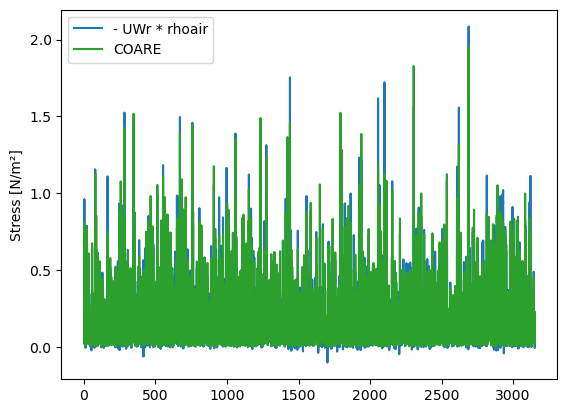

In [9]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

Text(0, 0.5, 'COARE [N/m²]')

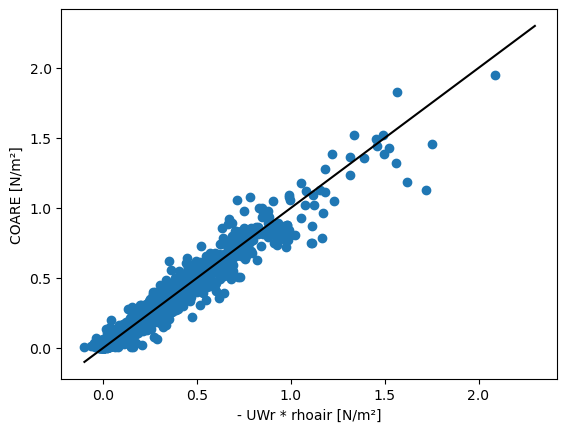

In [10]:
plt.scatter(y.values, c.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [11]:
df = df[( (df['UWr'] >= -2) & (df['UWr'] <= 2) )]               

In [12]:
df.shape

(3153, 65)

In [13]:
df.shape[0]*0.8

2522.4

In [14]:
split_idx = 2522

# Prepare features and labels

In [15]:
predictor_variables = [
    'sigma0_trip_fore', 'sigma0_trip_mid', 'sigma0_trip_aft',
    'azi_angle_trip_fore', 'azi_angle_trip_mid', 'azi_angle_trip_aft',
    'inc_angle_trip_fore', 'inc_angle_trip_mid', 'inc_angle_trip_aft'
]

In [16]:
x = df[predictor_variables]
x

,sigma0_trip_fore,sigma0_trip_mid,sigma0_trip_aft,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft
1414,-14.820142,-11.330853,-18.411169,-146.759995,-101.540001,-56.320000,37.700001,28.260000,37.619999
2370,-22.139551,-19.704023,-26.089172,-145.629990,-99.930000,-54.239998,52.250000,41.009998,52.139999
517,-20.286516,-19.421091,-25.652529,-24.269999,-69.049995,-114.029999,61.539997,50.480000,61.680000
26,-12.871778,-11.522446,-17.356697,114.989998,70.119995,25.379999,57.509998,46.320000,57.369999
1411,-21.161161,-14.682080,-18.018730,-27.180000,-72.010002,-117.049995,42.180000,32.119999,42.259998
...,...,...,...,...,...,...,...,...,...
1317,-17.996790,-13.238910,-20.913872,55.739998,101.199997,146.539993,40.509998,30.570000,40.480000
2283,-16.690342,-8.893511,-14.836706,56.199997,101.419998,146.580002,36.649998,27.410000,36.639999
2004,-22.323284,-14.964985,-16.798748,114.139999,69.260002,24.529999,60.669998,49.480000,60.520000
607,-24.564676,-21.732422,-25.840063,53.539997,99.419998,145.139999,54.770000,43.459999,54.770000


In [17]:
y = - df['UWr'] * df['rhoair']
y

1414    0.060413
2370    0.064483
517     0.115851
26      0.960851
1411    0.016968
          ...   
1317    0.025316
2283    0.086173
2004    0.229452
607    -0.008070
2775    0.025717
Length: 3153, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

# COARE

In [18]:
c = df['stress']

In [19]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [20]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [21]:
c_train = c[:split_idx]
c_test = c[split_idx:]

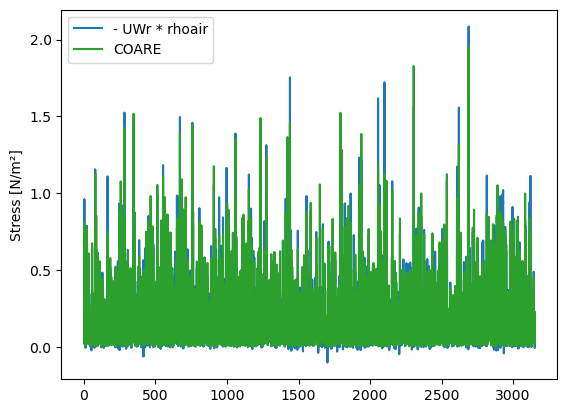

In [22]:

plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

# ML setup

In [28]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [29]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [30]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

2023-04-24 19:46:49.015861: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-04-24 19:46:49.016500: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-24 19:46:49.016509: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-24 19:46:49.016525: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ppi-r8login-b2.int.met.no): /proc/driver/nvidia/version does not exist
2023-04-24 19:46:49.016892: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations,

Epoch 1/500
56/56 [==============================] - 1s 14ms/step - loss: 10650.5334 - mean_absolute_error: 58.9661 - val_loss: 5544.8613 - val_mean_absolute_error: 50.9474
Epoch 2/500
56/56 [==============================] - 0s 938us/step - loss: 11580.4961 - mean_absolute_error: 53.0821 - val_loss: 4188.3330 - val_mean_absolute_error: 43.4267
Epoch 3/500
56/56 [==============================] - 0s 888us/step - loss: 14606.3617 - mean_absolute_error: 45.8331 - val_loss: 3268.7405 - val_mean_absolute_error: 37.0844
Epoch 4/500
56/56 [==============================] - 0s 874us/step - loss: 4627.9417 - mean_absolute_error: 36.2459 - val_loss: 2671.5708 - val_mean_absolute_error: 31.5916
Epoch 5/500
56/56 [==============================] - 0s 866us/step - loss: 6142.7317 - mean_absolute_error: 31.9262 - val_loss: 2348.1614 - val_mean_absolute_error: 26.9616
Epoch 6/500
56/56 [==============================] - 0s 858us/step - loss: 8291.0860 - mean_absolute_error: 28.7629 - val_loss: 2208.

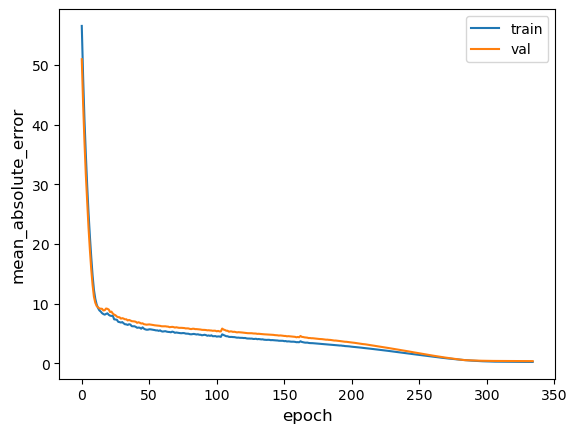

20/20 [==============================] - 0s 464us/step - loss: 0.1011 - mean_absolute_error: 0.2491
Test accuracy 0.24913552403450012
Test loss 0.10112776607275009


In [31]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [32]:
y_test_pred = multi_dense_model.predict(x_test)

In [33]:
np.mean(y_test)

0.1833452782289364

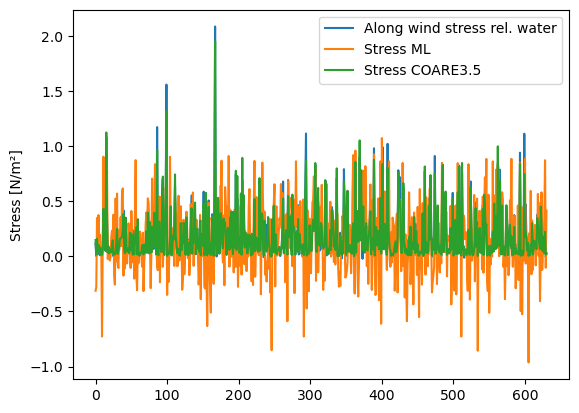

In [34]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

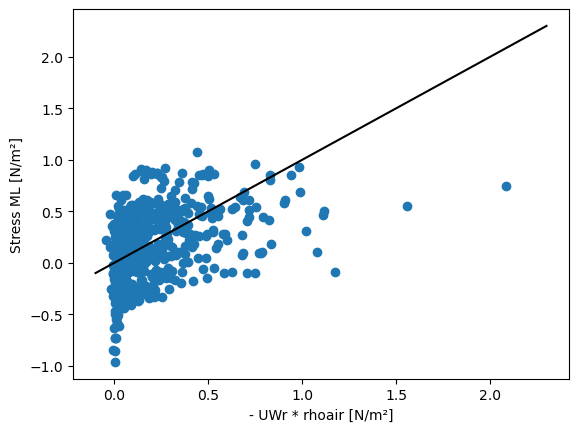

In [37]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

Text(0, 0.5, 'COARE [N/m²]')

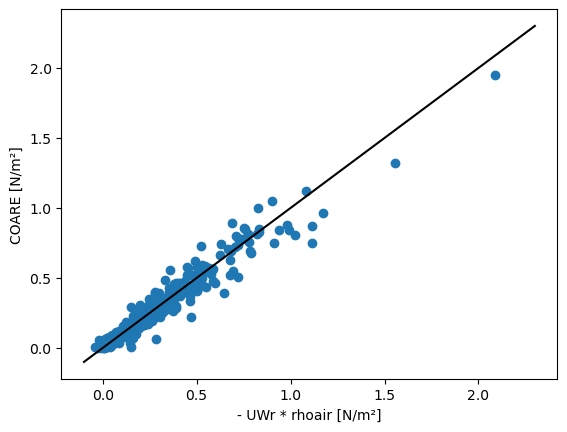

In [38]:
plt.scatter(y_test.values, c_test.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [35]:
rmse(y_test.values, y_test_pred)

0.40094176756707045

In [36]:
rmse(y_test.values, c_test)

0.05110989485700651

## Correlation

In [39]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.39513345],
       [0.39513345, 1.        ]])

In [40]:
np.corrcoef(y_test.values, c_test.values)

array([[1.       , 0.9752144],
       [0.9752144, 1.       ]])

# Other experiments

In [50]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [51]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [52]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
56/56 [==============================] - 0s 3ms/step - loss: 0.7159 - mean_absolute_error: 0.7018 - val_loss: 6.4627 - val_mean_absolute_error: 1.1274
Epoch 2/500
56/56 [==============================] - 0s 1ms/step - loss: 0.3695 - mean_absolute_error: 0.4582 - val_loss: 2.1399 - val_mean_absolute_error: 0.5298
Epoch 3/500
56/56 [==============================] - 0s 1ms/step - loss: 0.1867 - mean_absolute_error: 0.3209 - val_loss: 0.9933 - val_mean_absolute_error: 0.3773
Epoch 4/500
56/56 [==============================] - 0s 1ms/step - loss: 0.1365 - mean_absolute_error: 0.2709 - val_loss: 0.4724 - val_mean_absolute_error: 0.2941
Epoch 5/500
56/56 [==============================] - 0s 1ms/step - loss: 0.1038 - mean_absolute_error: 0.2400 - val_loss: 0.2389 - val_mean_absolute_error: 0.2474
Epoch 6/500
56/56 [==============================] - 0s 1ms/step - loss: 0.0873 - mean_absolute_error: 0.2168 - val_loss: 0.1241 - val_mean_absolute_error: 0.2091
Epoch 7/500
56/56 [===

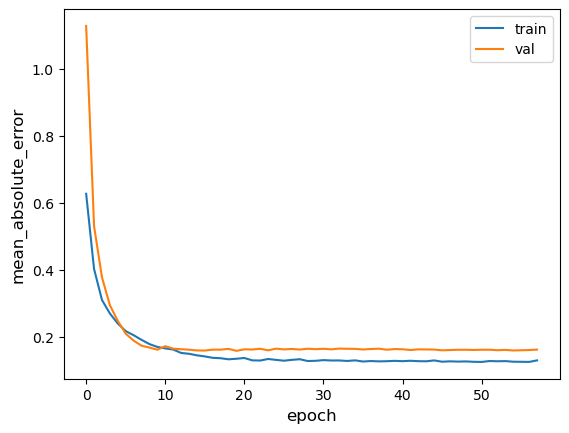

20/20 [==============================] - 0s 486us/step - loss: 0.0362 - mean_absolute_error: 0.1256
Test accuracy 0.12555250525474548
Test loss 0.03615730628371239


In [53]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [54]:
y_test_pred = multi_dense_model.predict(x_test)

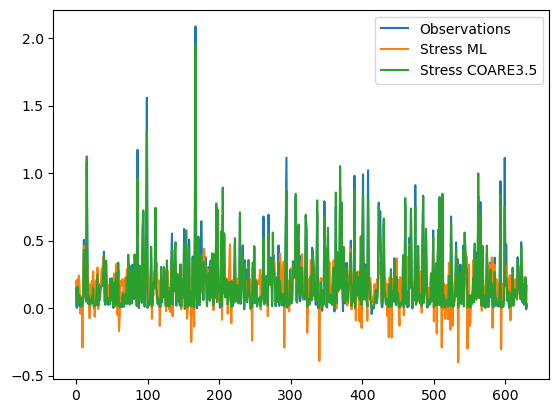

In [59]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

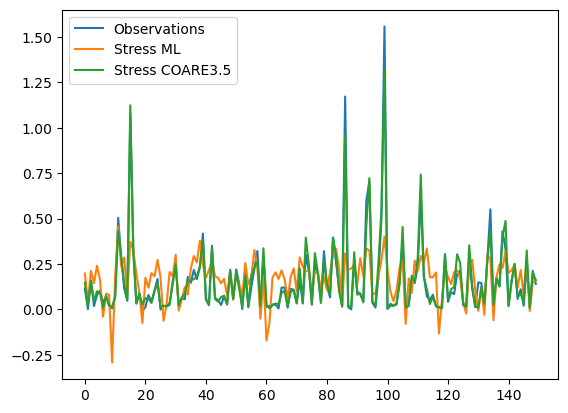

In [62]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

In [56]:
rmse(y_test.values, y_test_pred)

0.26611012959112734

## Correlation

In [57]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.56562693],
       [0.56562693, 1.        ]])

In [58]:
np.corrcoef(y_test.values, c_test.values)

array([[1.       , 0.9752144],
       [0.9752144, 1.       ]])

In [63]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [64]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [65]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
56/56 [==============================] - 0s 3ms/step - loss: 1.5742 - mean_absolute_error: 0.9387 - val_loss: 2.9298 - val_mean_absolute_error: 1.1140
Epoch 2/500
56/56 [==============================] - 0s 1ms/step - loss: 1.0564 - mean_absolute_error: 0.7055 - val_loss: 1.2486 - val_mean_absolute_error: 0.8019
Epoch 3/500
56/56 [==============================] - 0s 1ms/step - loss: 0.7851 - mean_absolute_error: 0.6377 - val_loss: 0.9158 - val_mean_absolute_error: 0.6149
Epoch 4/500
56/56 [==============================] - 0s 1ms/step - loss: 0.5272 - mean_absolute_error: 0.5279 - val_loss: 0.5316 - val_mean_absolute_error: 0.5009
Epoch 5/500
56/56 [==============================] - 0s 1ms/step - loss: 0.4864 - mean_absolute_error: 0.4680 - val_loss: 0.2666 - val_mean_absolute_error: 0.3733
Epoch 6/500
56/56 [==============================] - 0s 1ms/step - loss: 0.3494 - mean_absolute_error: 0.4136 - val_loss: 0.1570 - val_mean_absolute_error: 0.2935
Epoch 7/500
56/56 [===

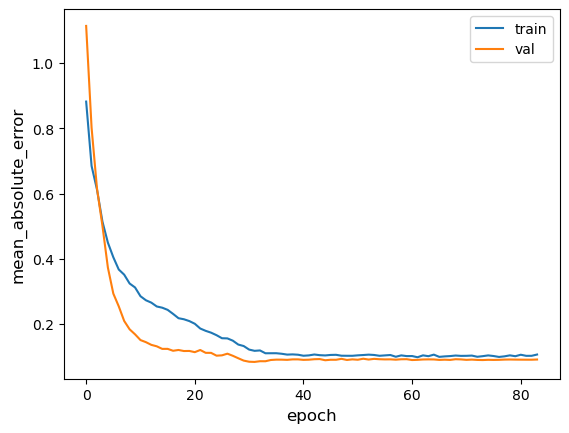

20/20 [==============================] - 0s 443us/step - loss: 0.0204 - mean_absolute_error: 0.0933
Test accuracy 0.09333626180887222
Test loss 0.020400196313858032


In [66]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [67]:
y_test_pred = multi_dense_model.predict(x_test)

In [69]:
rmse(y_test.values, y_test_pred)

0.2685986505122881

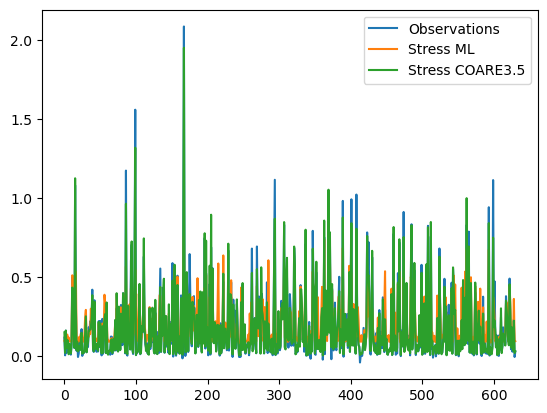

In [72]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

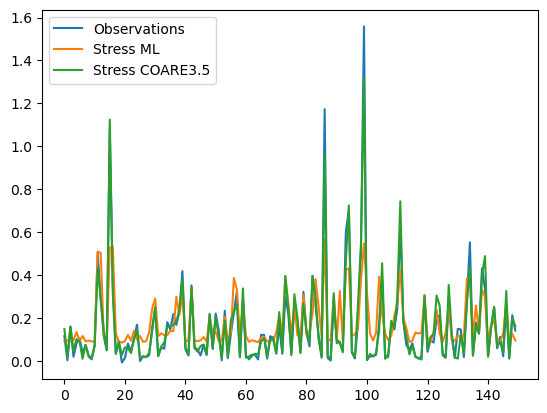

In [73]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [70]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.81340768],
       [0.81340768, 1.        ]])

In [71]:
np.corrcoef(y_test.values, c_test.values)

array([[1.       , 0.9752144],
       [0.9752144, 1.       ]])

In [23]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [24]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


In [25]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

2023-04-27 09:18:58.529531: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-04-27 09:18:58.531307: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-27 09:18:58.531319: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-27 09:18:58.531338: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6525-bm5jvp3-bn-compute): /proc/driver/nvidia/version does not exist
2023-04-27 09:18:58.532012: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, 

Epoch 1/500
56/56 [==============================] - 1s 13ms/step - loss: 0.3860 - mean_absolute_error: 0.4988 - val_loss: 0.4275 - val_mean_absolute_error: 0.5352
Epoch 2/500
56/56 [==============================] - 0s 1ms/step - loss: 0.2237 - mean_absolute_error: 0.3631 - val_loss: 0.1642 - val_mean_absolute_error: 0.3404
Epoch 3/500
56/56 [==============================] - 0s 962us/step - loss: 0.2251 - mean_absolute_error: 0.3321 - val_loss: 0.1072 - val_mean_absolute_error: 0.2698
Epoch 4/500
56/56 [==============================] - 0s 995us/step - loss: 0.1481 - mean_absolute_error: 0.2962 - val_loss: 0.0859 - val_mean_absolute_error: 0.2347
Epoch 5/500
56/56 [==============================] - 0s 972us/step - loss: 0.1314 - mean_absolute_error: 0.2668 - val_loss: 0.0728 - val_mean_absolute_error: 0.2083
Epoch 6/500
56/56 [==============================] - 0s 979us/step - loss: 0.1126 - mean_absolute_error: 0.2491 - val_loss: 0.0658 - val_mean_absolute_error: 0.1909
Epoch 7/500
5

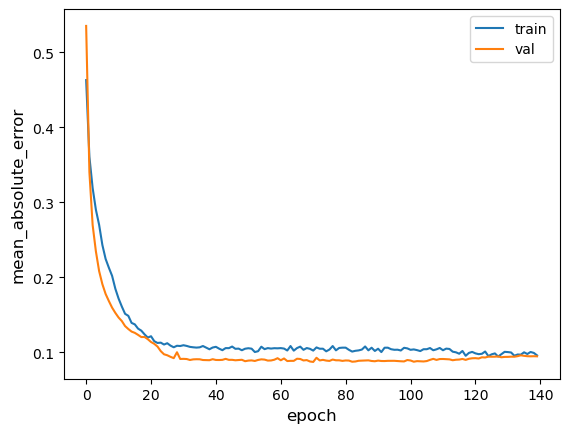

20/20 [==============================] - 0s 429us/step - loss: 0.0216 - mean_absolute_error: 0.0938
Test accuracy 0.09377256780862808
Test loss 0.021558551117777824


In [26]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [27]:
y_test_pred = multi_dense_model.predict(x_test)

In [28]:
rmse(y_test.values, y_test_pred)

0.25832173430560823

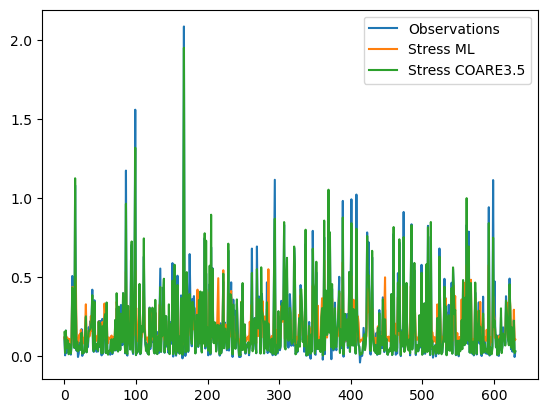

In [29]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

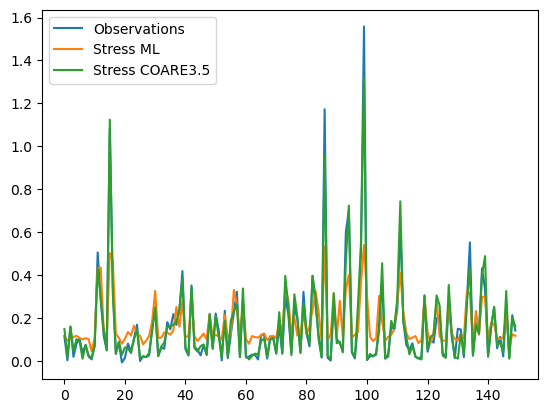

In [30]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

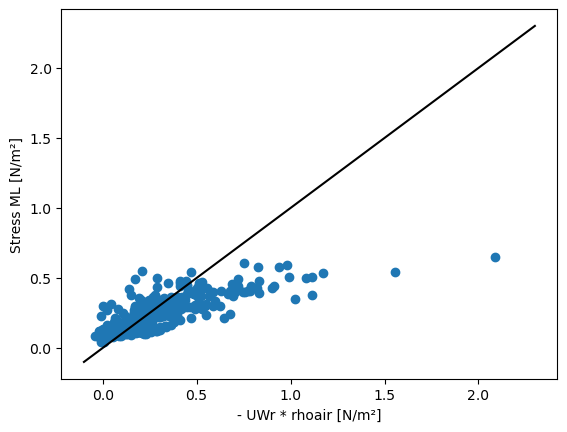

In [33]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [31]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.83679299],
       [0.83679299, 1.        ]])

In [32]:
np.corrcoef(y_test.values, c_test.values)

array([[1.       , 0.9752144],
       [0.9752144, 1.       ]])

In [34]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [35]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [36]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
111/111 [==============================] - 0s 2ms/step - loss: 0.8441 - mean_absolute_error: 0.6047 - val_loss: 11.4243 - val_mean_absolute_error: 0.3688
Epoch 2/500
111/111 [==============================] - 0s 839us/step - loss: 0.5007 - mean_absolute_error: 0.4271 - val_loss: 8.7685 - val_mean_absolute_error: 0.3990
Epoch 3/500
111/111 [==============================] - 0s 808us/step - loss: 0.3819 - mean_absolute_error: 0.3741 - val_loss: 5.4772 - val_mean_absolute_error: 0.3056
Epoch 4/500
111/111 [==============================] - 0s 772us/step - loss: 0.3070 - mean_absolute_error: 0.3474 - val_loss: 4.1735 - val_mean_absolute_error: 0.2825
Epoch 5/500
111/111 [==============================] - 0s 783us/step - loss: 0.2343 - mean_absolute_error: 0.3005 - val_loss: 3.2649 - val_mean_absolute_error: 0.2361
Epoch 6/500
111/111 [==============================] - 0s 786us/step - loss: 0.1824 - mean_absolute_error: 0.2804 - val_loss: 3.0793 - val_mean_absolute_error: 0.2193

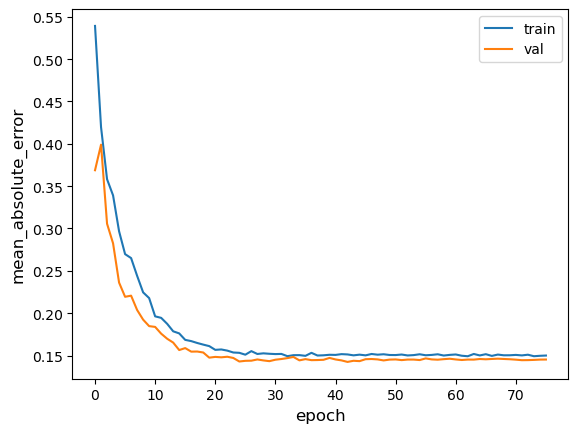

20/20 [==============================] - 0s 433us/step - loss: 0.0522 - mean_absolute_error: 0.1557
Test accuracy 0.15573100745677948
Test loss 0.052156366407871246


In [37]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [38]:
y_test_pred = multi_dense_model.predict(x_test)

In [39]:
rmse(y_test.values, y_test_pred)

0.2308663861462487

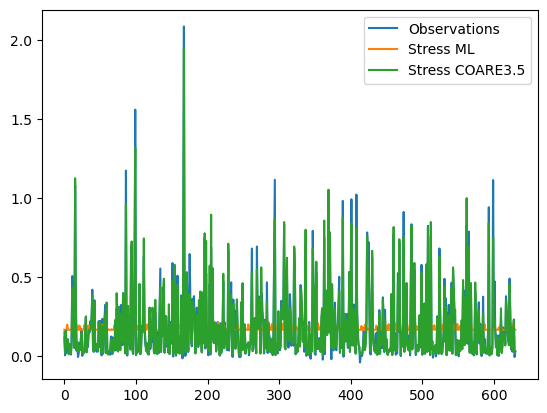

In [40]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

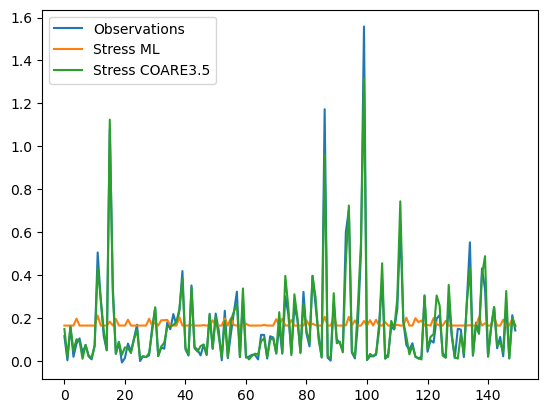

In [41]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

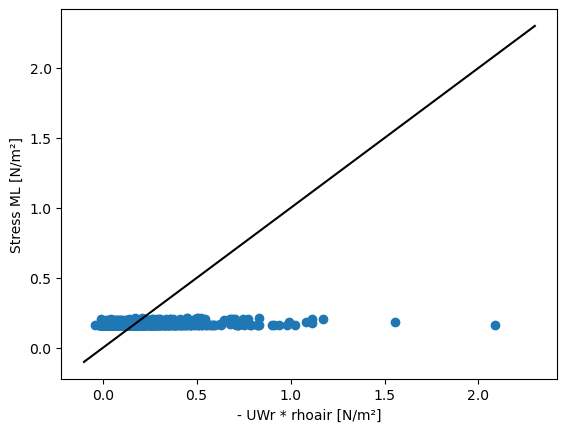

In [42]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [43]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.18089756],
       [0.18089756, 1.        ]])

In [44]:
np.corrcoef(y_test.values, c_test.values)

array([[1.       , 0.9752144],
       [0.9752144, 1.       ]])

In [45]:
OUT_STEPS = 1
num_features = 1
batch_size =64
epochs=500

metric = 'mean_absolute_error'

In [46]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [47]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
28/28 [==============================] - 0s 5ms/step - loss: 2.6084 - mean_absolute_error: 1.2900 - val_loss: 2.8117 - val_mean_absolute_error: 1.4196
Epoch 2/500
28/28 [==============================] - 0s 2ms/step - loss: 2.2463 - mean_absolute_error: 1.1482 - val_loss: 1.0021 - val_mean_absolute_error: 0.8090
Epoch 3/500
28/28 [==============================] - 0s 1ms/step - loss: 1.7258 - mean_absolute_error: 1.0111 - val_loss: 0.5054 - val_mean_absolute_error: 0.5711
Epoch 4/500
28/28 [==============================] - 0s 1ms/step - loss: 1.4966 - mean_absolute_error: 0.9229 - val_loss: 0.3427 - val_mean_absolute_error: 0.4692
Epoch 5/500
28/28 [==============================] - 0s 1ms/step - loss: 1.1251 - mean_absolute_error: 0.8014 - val_loss: 0.2544 - val_mean_absolute_error: 0.3864
Epoch 6/500
28/28 [==============================] - 0s 1ms/step - loss: 1.0505 - mean_absolute_error: 0.7245 - val_loss: 0.2130 - val_mean_absolute_error: 0.3565
Epoch 7/500
28/28 [===

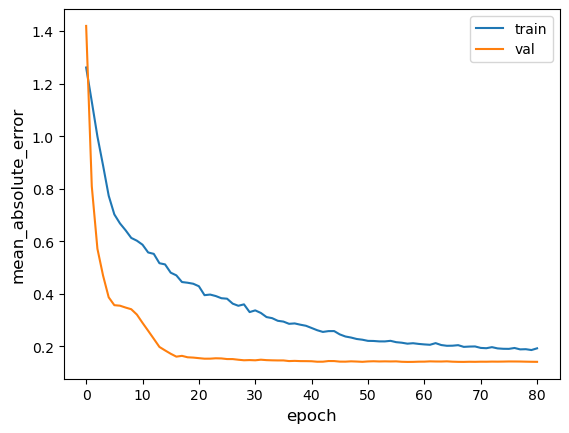

20/20 [==============================] - 0s 439us/step - loss: 0.0474 - mean_absolute_error: 0.1453
Test accuracy 0.14529502391815186
Test loss 0.04739914834499359


In [48]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [49]:
y_test_pred = multi_dense_model.predict(x_test)

In [50]:
rmse(y_test.values, y_test_pred)

0.23708210520517328

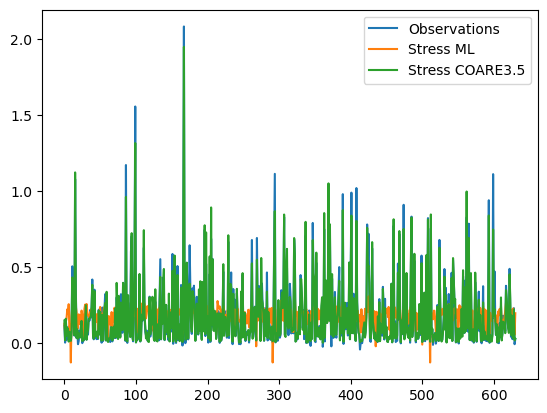

In [51]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

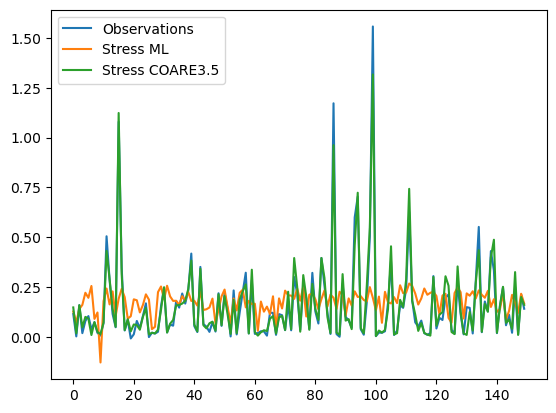

In [52]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

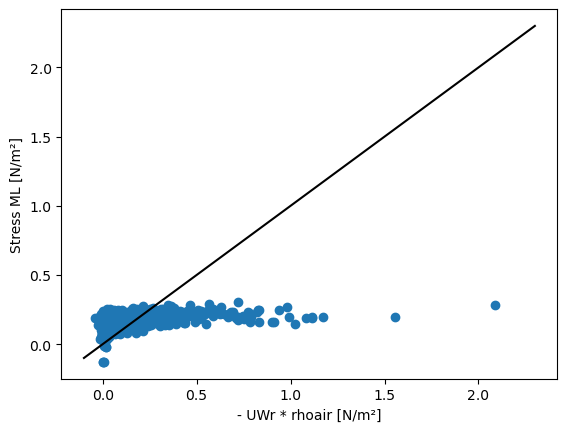

In [53]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [54]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.33860623],
       [0.33860623, 1.        ]])

In [55]:
np.corrcoef(y_test.values, c_test.values)

array([[1.       , 0.9752144],
       [0.9752144, 1.       ]])

In [56]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [57]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [58]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
56/56 [==============================] - 0s 3ms/step - loss: 2.5702 - mean_absolute_error: 1.2405 - val_loss: 1.3238 - val_mean_absolute_error: 1.0233
Epoch 2/500
56/56 [==============================] - 0s 1ms/step - loss: 1.0641 - mean_absolute_error: 0.8260 - val_loss: 0.3016 - val_mean_absolute_error: 0.3289
Epoch 3/500
56/56 [==============================] - 0s 1ms/step - loss: 0.6918 - mean_absolute_error: 0.6646 - val_loss: 0.1633 - val_mean_absolute_error: 0.2166
Epoch 4/500
56/56 [==============================] - 0s 1ms/step - loss: 0.5493 - mean_absolute_error: 0.5868 - val_loss: 0.0835 - val_mean_absolute_error: 0.1774
Epoch 5/500
56/56 [==============================] - 0s 1ms/step - loss: 0.4933 - mean_absolute_error: 0.5447 - val_loss: 0.0545 - val_mean_absolute_error: 0.1579
Epoch 6/500
56/56 [==============================] - 0s 1ms/step - loss: 0.4336 - mean_absolute_error: 0.5154 - val_loss: 0.0651 - val_mean_absolute_error: 0.1489
Epoch 7/500
56/56 [===

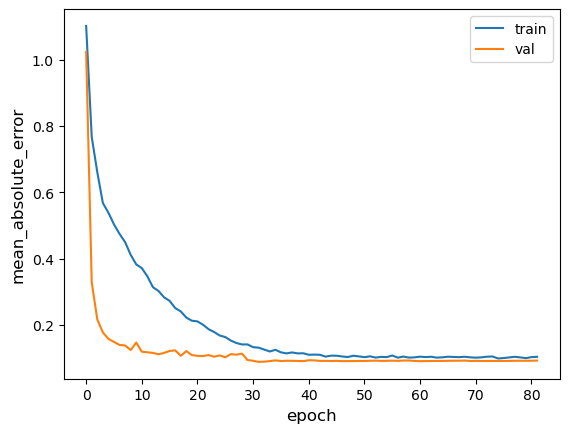

20/20 [==============================] - 0s 465us/step - loss: 0.0205 - mean_absolute_error: 0.0886
Test accuracy 0.08855421841144562
Test loss 0.020463649183511734


In [59]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [60]:
y_test_pred = multi_dense_model.predict(x_test)

In [61]:
rmse(y_test.values, y_test_pred)

0.26691086672759046

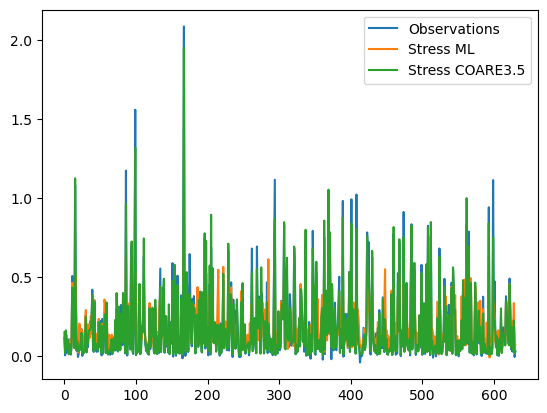

In [62]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

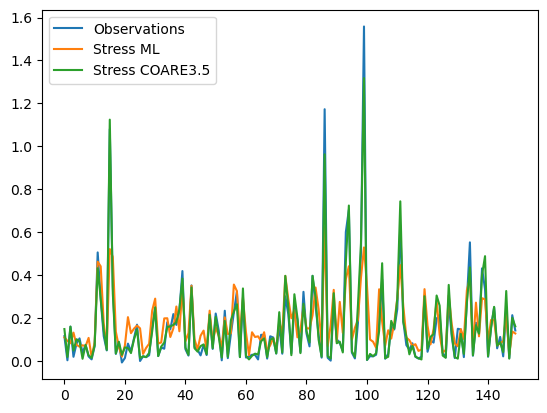

In [63]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

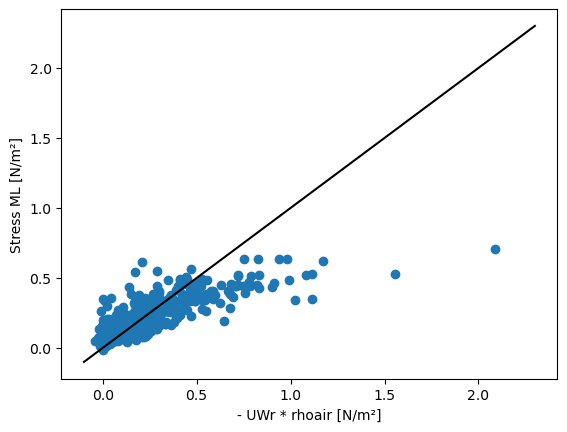

In [64]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [65]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.81614482],
       [0.81614482, 1.        ]])

In [66]:
np.corrcoef(y_test.values, c_test.values)

array([[1.       , 0.9752144],
       [0.9752144, 1.       ]])

In [67]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [68]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [69]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
56/56 [==============================] - 1s 3ms/step - loss: 0.5352 - mean_absolute_error: 0.5752 - val_loss: 0.3610 - val_mean_absolute_error: 0.3952
Epoch 2/500
56/56 [==============================] - 0s 1ms/step - loss: 0.3337 - mean_absolute_error: 0.4324 - val_loss: 0.2406 - val_mean_absolute_error: 0.2422
Epoch 3/500
56/56 [==============================] - 0s 1ms/step - loss: 0.2197 - mean_absolute_error: 0.3498 - val_loss: 0.1495 - val_mean_absolute_error: 0.1711
Epoch 4/500
56/56 [==============================] - 0s 1ms/step - loss: 0.1779 - mean_absolute_error: 0.3199 - val_loss: 0.1211 - val_mean_absolute_error: 0.1567
Epoch 5/500
56/56 [==============================] - 0s 1ms/step - loss: 0.1480 - mean_absolute_error: 0.2830 - val_loss: 0.0994 - val_mean_absolute_error: 0.1522
Epoch 6/500
56/56 [==============================] - 0s 1ms/step - loss: 0.1277 - mean_absolute_error: 0.2750 - val_loss: 0.0867 - val_mean_absolute_error: 0.1439
Epoch 7/500
56/56 [===

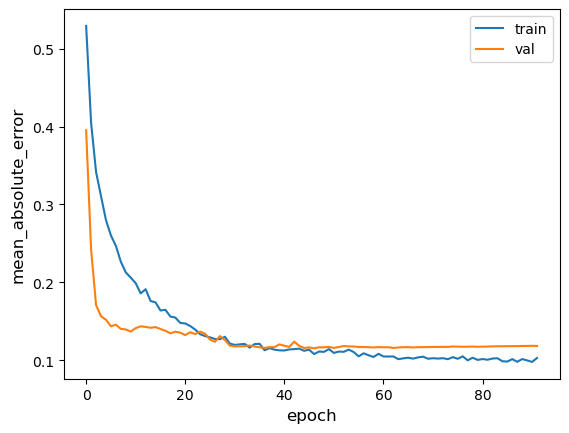

20/20 [==============================] - 0s 403us/step - loss: 0.0507 - mean_absolute_error: 0.1334
Test accuracy 0.1334041804075241
Test loss 0.05065876245498657


In [70]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [71]:
y_test_pred = multi_dense_model.predict(x_test)

In [72]:
rmse(y_test.values, y_test_pred)

0.24302534746171292

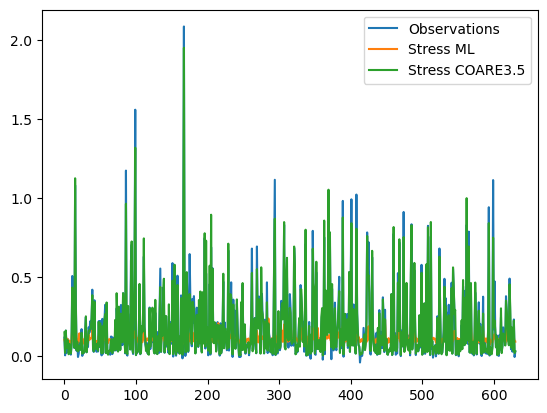

In [73]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

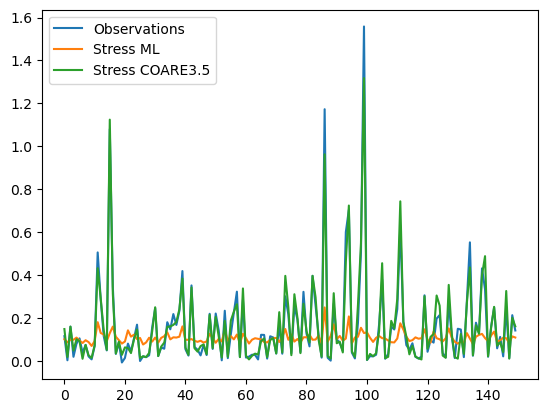

In [74]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

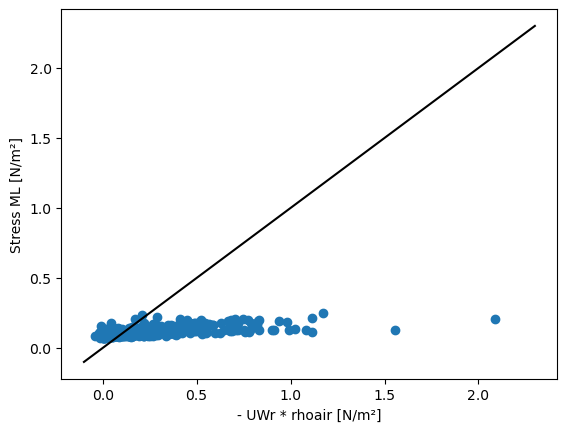

In [75]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [76]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.65206619],
       [0.65206619, 1.        ]])

In [77]:
np.corrcoef(y_test.values, c_test.values)

array([[1.       , 0.9752144],
       [0.9752144, 1.       ]])

In [78]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [79]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [80]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
56/56 [==============================] - 0s 2ms/step - loss: 3.4151 - mean_absolute_error: 1.3738 - val_loss: 3.5179 - val_mean_absolute_error: 1.4439
Epoch 2/500
56/56 [==============================] - 0s 1ms/step - loss: 2.5735 - mean_absolute_error: 1.1779 - val_loss: 1.6121 - val_mean_absolute_error: 0.9533
Epoch 3/500
56/56 [==============================] - 0s 1ms/step - loss: 2.0312 - mean_absolute_error: 1.0410 - val_loss: 0.9937 - val_mean_absolute_error: 0.7457
Epoch 4/500
56/56 [==============================] - 0s 1ms/step - loss: 1.4329 - mean_absolute_error: 0.9080 - val_loss: 0.5884 - val_mean_absolute_error: 0.5954
Epoch 5/500
56/56 [==============================] - 0s 1ms/step - loss: 0.8922 - mean_absolute_error: 0.7321 - val_loss: 0.4338 - val_mean_absolute_error: 0.5162
Epoch 6/500
56/56 [==============================] - 0s 1ms/step - loss: 0.7726 - mean_absolute_error: 0.6985 - val_loss: 0.3459 - val_mean_absolute_error: 0.4554
Epoch 7/500
56/56 [===

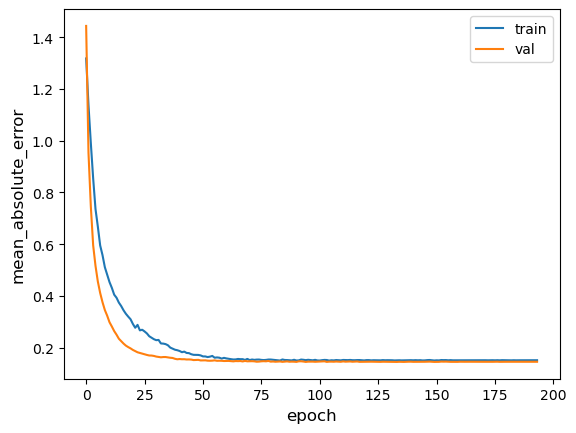

20/20 [==============================] - 0s 435us/step - loss: 0.0530 - mean_absolute_error: 0.1570
Test accuracy 0.15704649686813354
Test loss 0.05296275392174721


In [81]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [82]:
y_test_pred = multi_dense_model.predict(x_test)

In [83]:
rmse(y_test.values, y_test_pred)

0.2305978468661764

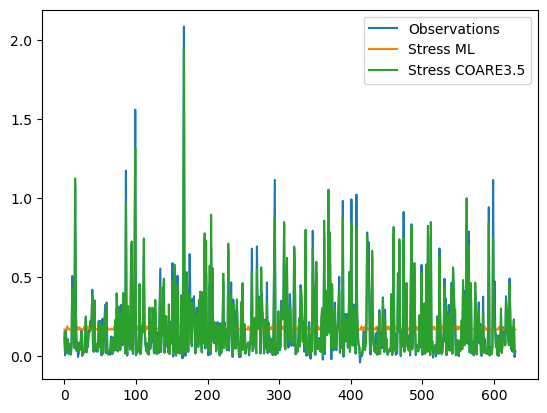

In [84]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

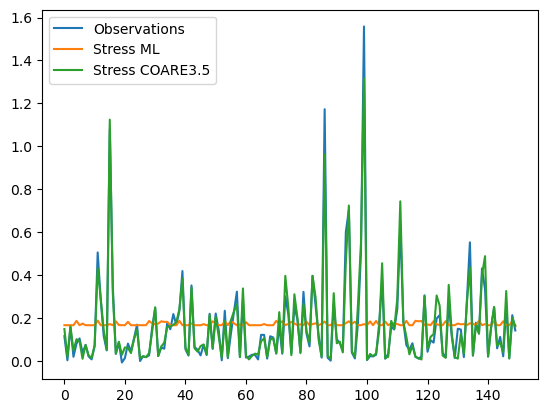

In [85]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

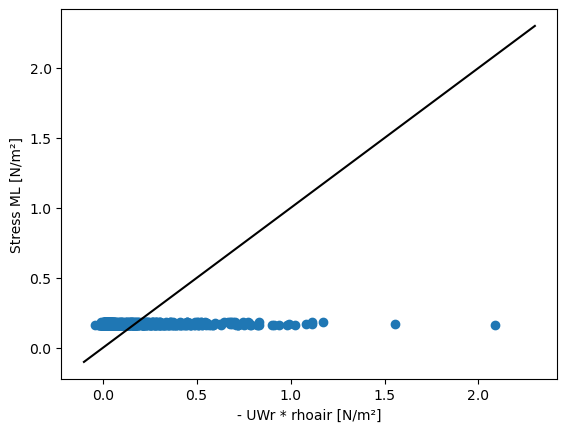

In [86]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [87]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.06155162],
       [0.06155162, 1.        ]])

In [88]:
np.corrcoef(y_test.values, c_test.values)

array([[1.       , 0.9752144],
       [0.9752144, 1.       ]])

In [89]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [90]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [91]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
56/56 [==============================] - 0s 3ms/step - loss: 1.9352 - mean_absolute_error: 1.0911 - val_loss: 1.6528 - val_mean_absolute_error: 0.9283
Epoch 2/500
56/56 [==============================] - 0s 1ms/step - loss: 1.0578 - mean_absolute_error: 0.8268 - val_loss: 0.4064 - val_mean_absolute_error: 0.4530
Epoch 3/500
56/56 [==============================] - 0s 1ms/step - loss: 0.7069 - mean_absolute_error: 0.6823 - val_loss: 0.2056 - val_mean_absolute_error: 0.3297
Epoch 4/500
56/56 [==============================] - 0s 1ms/step - loss: 0.5977 - mean_absolute_error: 0.6106 - val_loss: 0.1496 - val_mean_absolute_error: 0.2834
Epoch 5/500
56/56 [==============================] - 0s 1ms/step - loss: 0.4975 - mean_absolute_error: 0.5658 - val_loss: 0.1249 - val_mean_absolute_error: 0.2587
Epoch 6/500
56/56 [==============================] - 0s 983us/step - loss: 0.4387 - mean_absolute_error: 0.5159 - val_loss: 0.1086 - val_mean_absolute_error: 0.2389
Epoch 7/500
56/56 [=

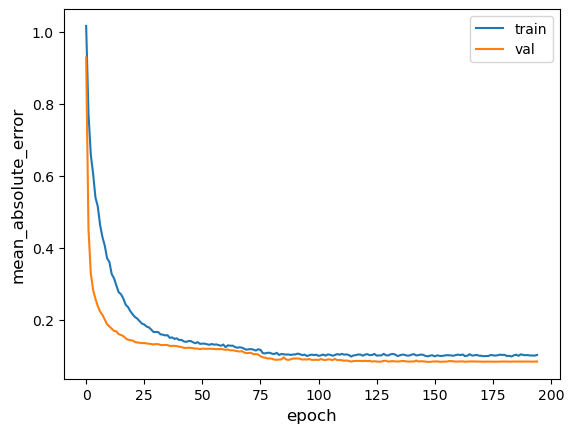

20/20 [==============================] - 0s 461us/step - loss: 0.0201 - mean_absolute_error: 0.0892
Test accuracy 0.08918425440788269
Test loss 0.02005796879529953


In [92]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [93]:
y_test_pred = multi_dense_model.predict(x_test)

In [94]:
rmse(y_test.values, y_test_pred)

0.26348895318867305

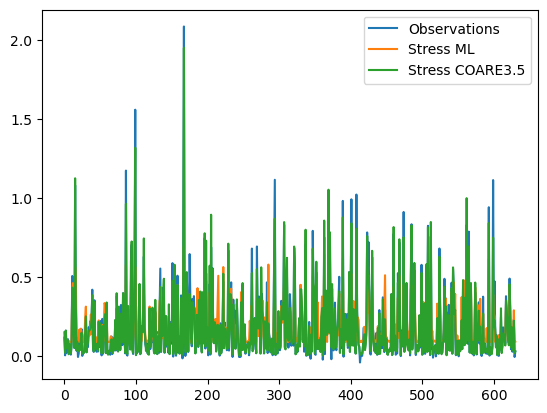

In [95]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

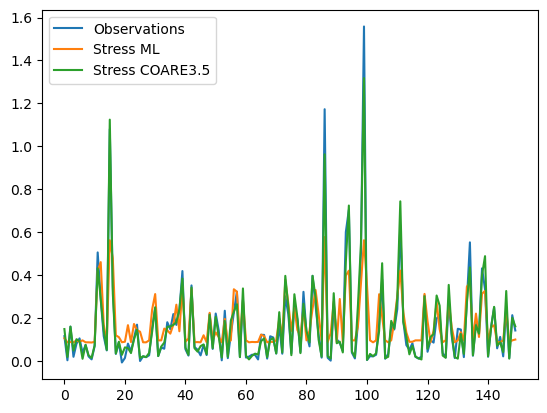

In [96]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

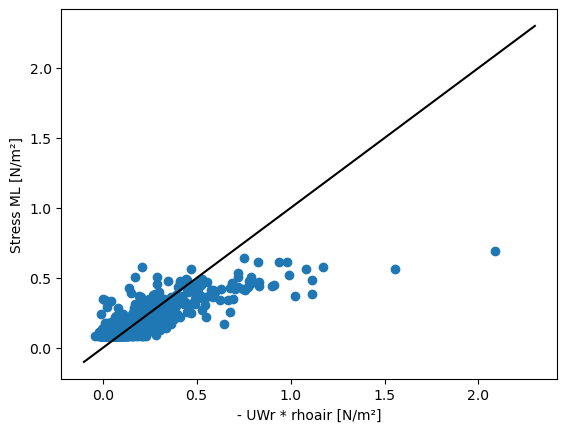

In [97]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [98]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.       , 0.8361854],
       [0.8361854, 1.       ]])

In [99]:
np.corrcoef(y_test.values, c_test.values)

array([[1.       , 0.9752144],
       [0.9752144, 1.       ]])

In [100]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [101]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [102]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.6),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
56/56 [==============================] - 0s 3ms/step - loss: 0.9103 - mean_absolute_error: 0.6377 - val_loss: 1.5487 - val_mean_absolute_error: 0.6850
Epoch 2/500
56/56 [==============================] - 0s 1ms/step - loss: 0.7234 - mean_absolute_error: 0.5766 - val_loss: 0.7089 - val_mean_absolute_error: 0.4675
Epoch 3/500
56/56 [==============================] - 0s 1ms/step - loss: 0.5541 - mean_absolute_error: 0.5187 - val_loss: 0.4506 - val_mean_absolute_error: 0.3692
Epoch 4/500
56/56 [==============================] - 0s 1ms/step - loss: 0.4072 - mean_absolute_error: 0.4525 - val_loss: 0.3077 - val_mean_absolute_error: 0.3113
Epoch 5/500
56/56 [==============================] - 0s 1ms/step - loss: 0.3770 - mean_absolute_error: 0.4428 - val_loss: 0.2357 - val_mean_absolute_error: 0.2701
Epoch 6/500
56/56 [==============================] - 0s 1ms/step - loss: 0.3045 - mean_absolute_error: 0.4106 - val_loss: 0.1750 - val_mean_absolute_error: 0.2356
Epoch 7/500
56/56 [===

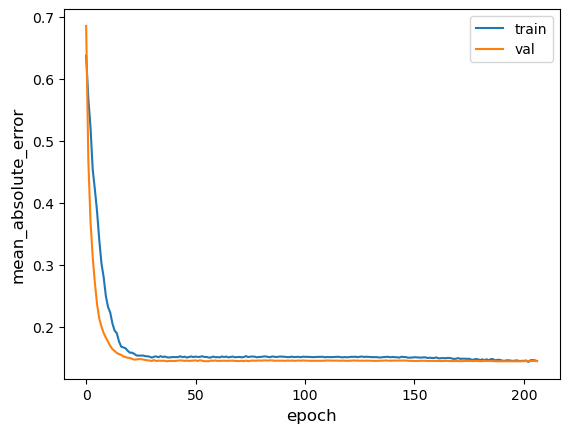

20/20 [==============================] - 0s 444us/step - loss: 0.0509 - mean_absolute_error: 0.1529
Test accuracy 0.15286198258399963
Test loss 0.05090333893895149


In [103]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [104]:
y_test_pred = multi_dense_model.predict(x_test)

In [105]:
rmse(y_test.values, y_test_pred)

0.2308736105322995

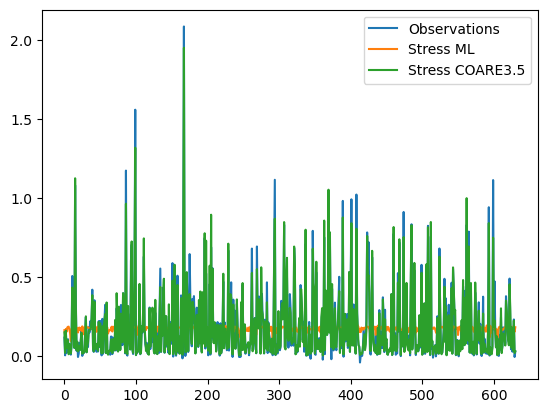

In [106]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

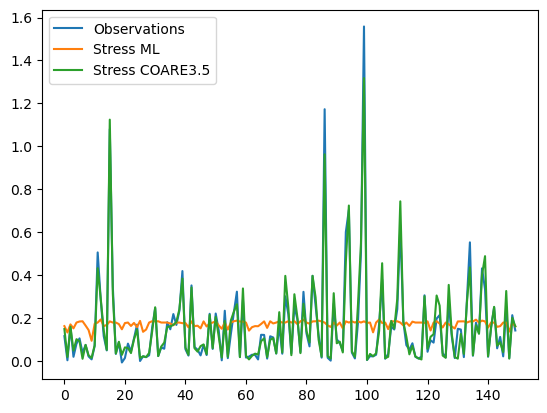

In [107]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

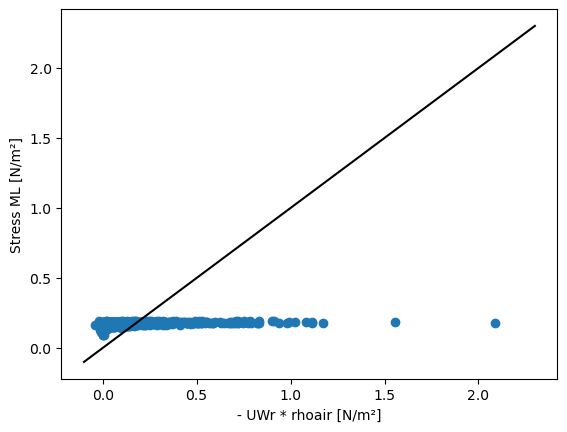

In [108]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [109]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.35932352],
       [0.35932352, 1.        ]])

In [110]:
np.corrcoef(y_test.values, c_test.values)

array([[1.       , 0.9752144],
       [0.9752144, 1.       ]])

In [111]:
OUT_STEPS = 1
num_features = 1
batch_size =128
epochs=500

metric = 'mean_absolute_error'

In [112]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [113]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
14/14 [==============================] - 0s 9ms/step - loss: 2.2784 - mean_absolute_error: 1.2213 - val_loss: 14.9165 - val_mean_absolute_error: 3.0136
Epoch 2/500
14/14 [==============================] - 0s 2ms/step - loss: 1.8761 - mean_absolute_error: 1.1097 - val_loss: 8.1446 - val_mean_absolute_error: 2.2146
Epoch 3/500
14/14 [==============================] - 0s 2ms/step - loss: 1.4974 - mean_absolute_error: 1.0089 - val_loss: 4.9978 - val_mean_absolute_error: 1.6786
Epoch 4/500
14/14 [==============================] - 0s 2ms/step - loss: 1.2129 - mean_absolute_error: 0.8833 - val_loss: 3.3979 - val_mean_absolute_error: 1.3998
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 0.9908 - mean_absolute_error: 0.7784 - val_loss: 2.5895 - val_mean_absolute_error: 1.2831
Epoch 6/500
14/14 [==============================] - 0s 2ms/step - loss: 0.8122 - mean_absolute_error: 0.6834 - val_loss: 1.9857 - val_mean_absolute_error: 1.1249
Epoch 7/500
14/14 [==

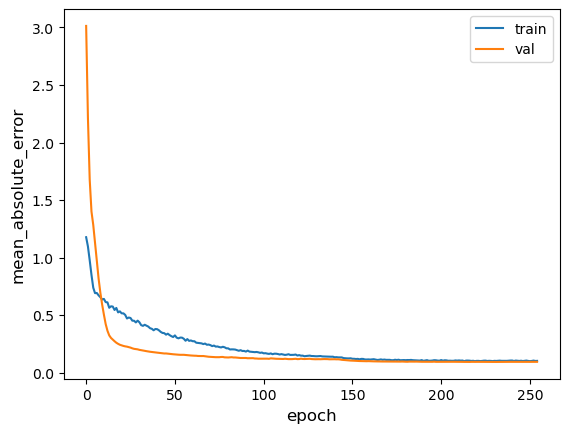

20/20 [==============================] - 0s 489us/step - loss: 0.0213 - mean_absolute_error: 0.0902
Test accuracy 0.09022366255521774
Test loss 0.021286003291606903


In [114]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [115]:
y_test_pred = multi_dense_model.predict(x_test)

In [116]:
rmse(y_test.values, y_test_pred)

0.26193153188562135

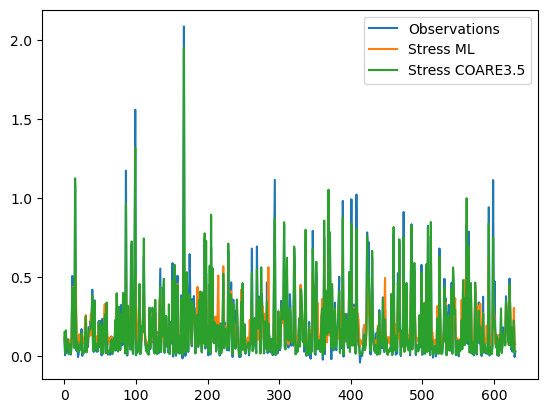

In [117]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

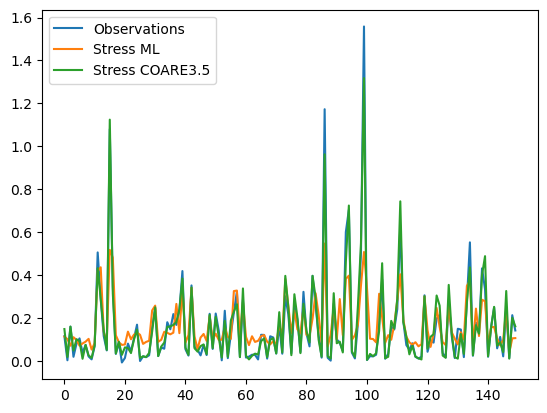

In [118]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

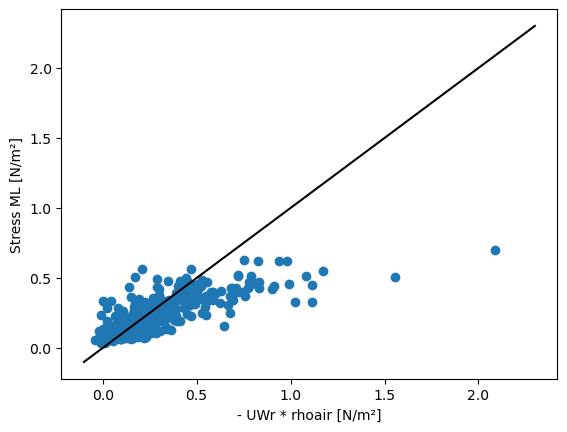

In [119]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [120]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.82397084],
       [0.82397084, 1.        ]])

In [121]:
np.corrcoef(y_test.values, c_test.values)

array([[1.       , 0.9752144],
       [0.9752144, 1.       ]])